# Research goal: Predict house price using regression.

In [1]:
#Ignore warnings
import warnings
warnings.filterwarnings("ignore")

#Math and vectors
import pandas as pd
import numpy as np

#Visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

#ML
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from numpy.ma.core import floor

import pickle

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/housesalesprediction/kc_house_data.csv


In [3]:
df = pd.read_csv("/kaggle/input/housesalesprediction/kc_house_data.csv")

In [4]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
df.shape

(21613, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [7]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [8]:
df.nunique()

id               21436
date               372
price             4028
bedrooms            13
bathrooms           30
sqft_living       1038
sqft_lot          9782
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         946
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5034
long               752
sqft_living15      777
sqft_lot15        8689
dtype: int64

In [9]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

<Axes: >

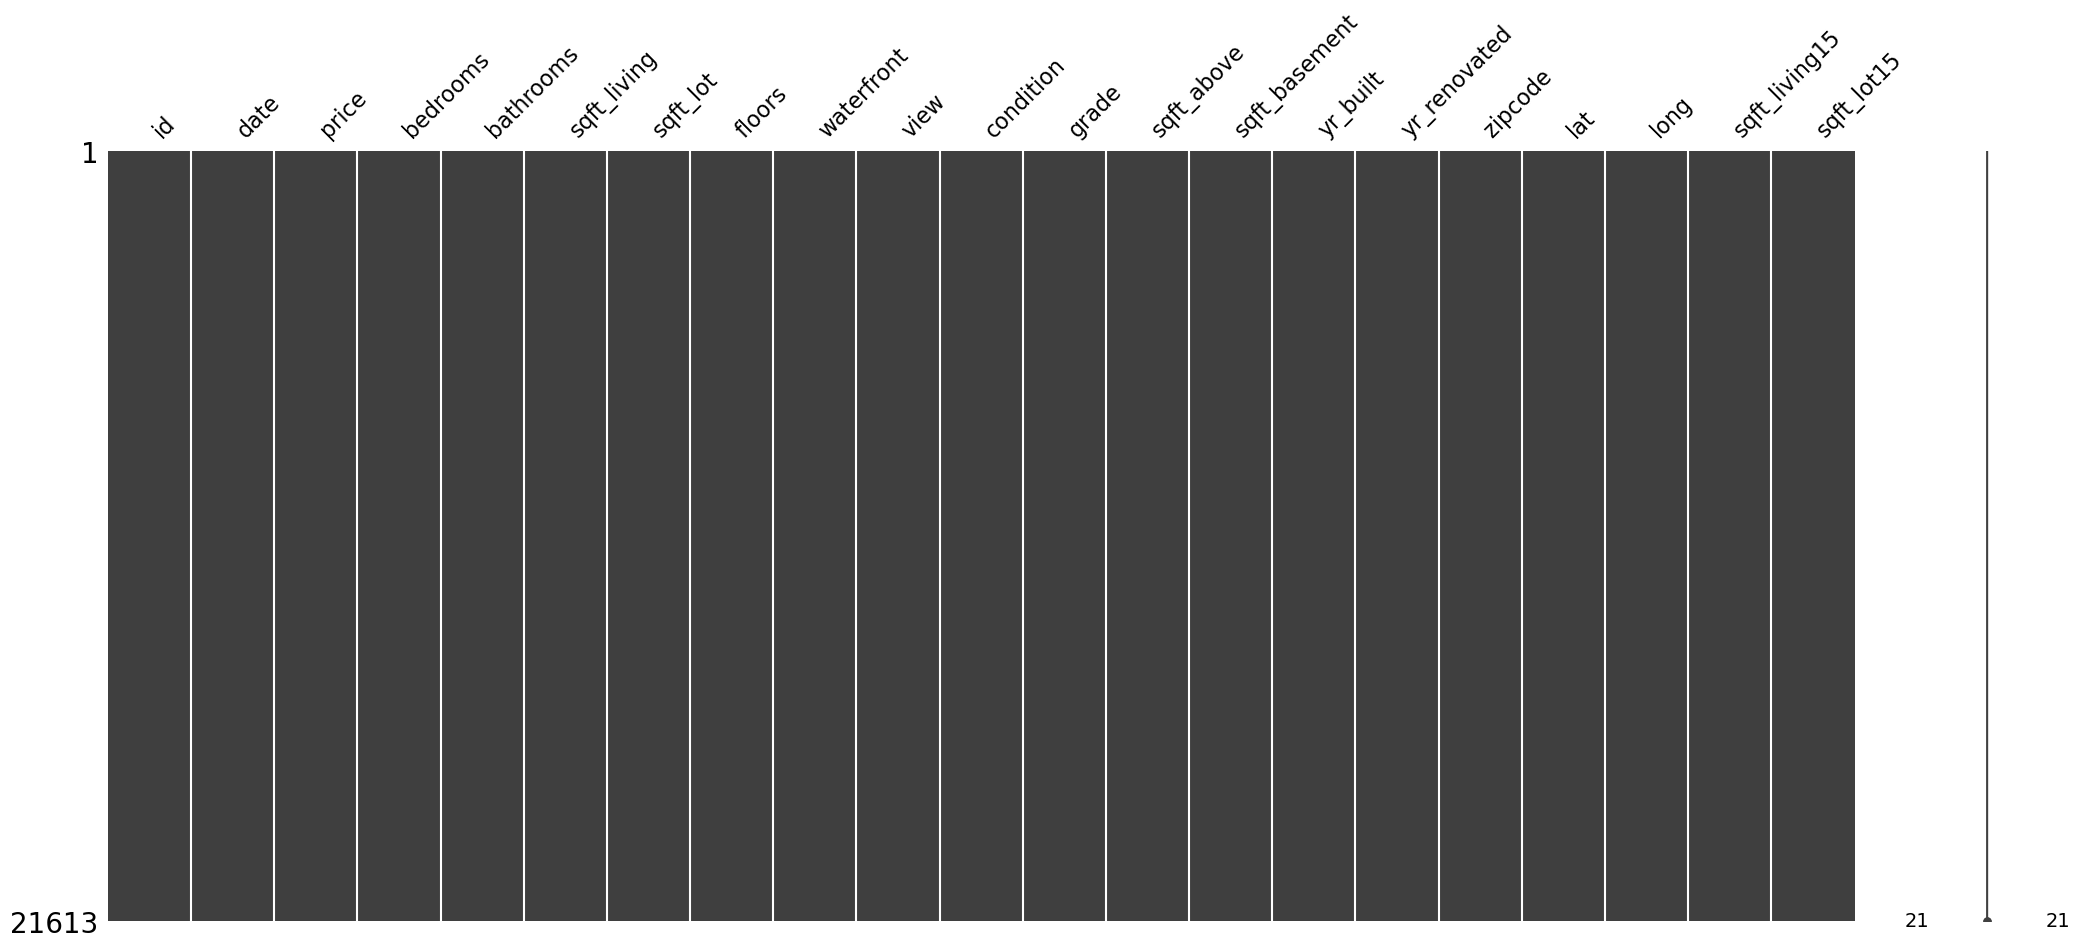

In [10]:
msno.matrix(df)

In [11]:
df.duplicated().sum()

0

In [12]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# EDA and Data Preprocessing

In [13]:
#Handling date column
df["date"]

0        20141013T000000
1        20141209T000000
2        20150225T000000
3        20141209T000000
4        20150218T000000
              ...       
21608    20140521T000000
21609    20150223T000000
21610    20140623T000000
21611    20150116T000000
21612    20141015T000000
Name: date, Length: 21613, dtype: object

In [14]:
df["datetime"] = pd.to_datetime(df["date"])
df["year"] = df["datetime"].dt.year
df["month"] = df["datetime"].dt.month

In [15]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,datetime,year,month
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,1955,0,98178,47.5112,-122.257,1340,5650,2014-10-13,2014,10
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,1951,1991,98125,47.7210,-122.319,1690,7639,2014-12-09,2014,12
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,1933,0,98028,47.7379,-122.233,2720,8062,2015-02-25,2015,2
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,1965,0,98136,47.5208,-122.393,1360,5000,2014-12-09,2014,12
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,1987,0,98074,47.6168,-122.045,1800,7503,2015-02-18,2015,2


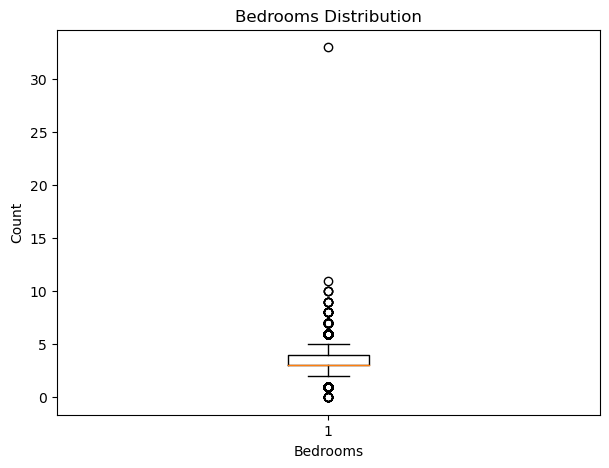

In [16]:
plt.figure(figsize = (7, 5))
plt.boxplot(df["bedrooms"])
plt.xlabel("Bedrooms")
plt.ylabel("Count")
plt.title("Bedrooms Distribution")
plt.show()

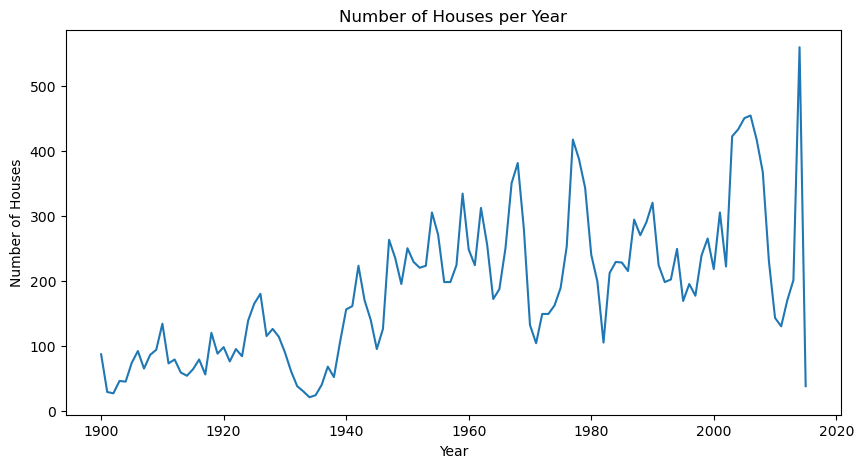

In [17]:
# Number of Houses per Year
houses_per_year = df.groupby("yr_built")["id"].count()
plt.figure(figsize = (10, 5))
plt.plot(houses_per_year.index, houses_per_year.values)
plt.xlabel("Year")
plt.ylabel("Number of Houses")
plt.title("Number of Houses per Year")
plt.show()

<Axes: xlabel='price', ylabel='sqft_living'>

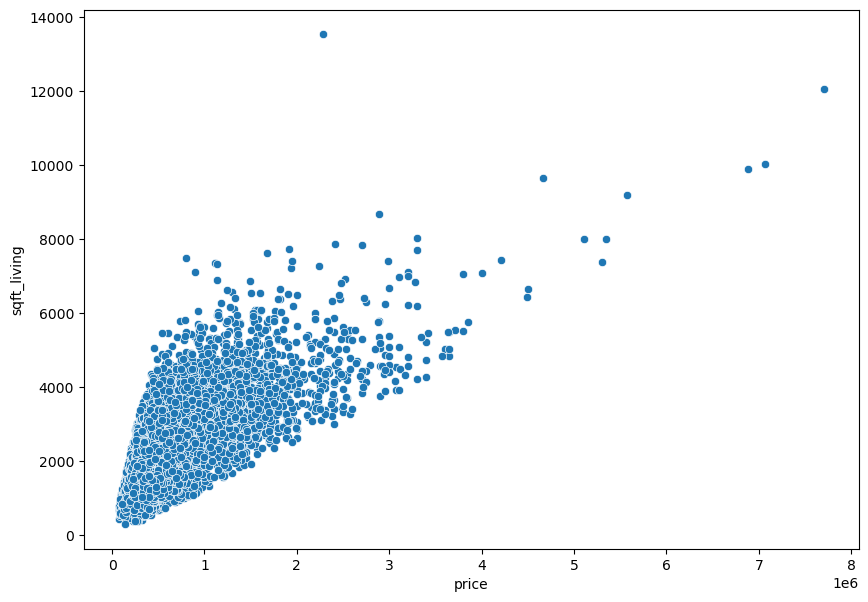

In [18]:
# Square footage of the apartments interior living space VS Price
plt.figure(figsize = (10, 7))
sns.scatterplot(x = "price", y = "sqft_living", data = df)

### What is the largest number of bedrooms in houses?

In [19]:
print("Largest number of bedrooms in houses:", max(df["bedrooms"]))

Largest number of bedrooms in houses: 33


### What are the oldest and newest houses?

In [20]:
print("The oldest house: ", df["yr_built"].min())
print("The newst house: ", df["yr_built"].max())

The oldest house:  1900
The newst house:  2015


### What are the unique years in our dataset?

In [21]:
year_unique = df["yr_built"].sort_values().unique()
year_unique

array([1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910,
       1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921,
       1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932,
       1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943,
       1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954,
       1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965,
       1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976,
       1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987,
       1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998,
       1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012, 2013, 2014, 2015])

# Correlation Matrix

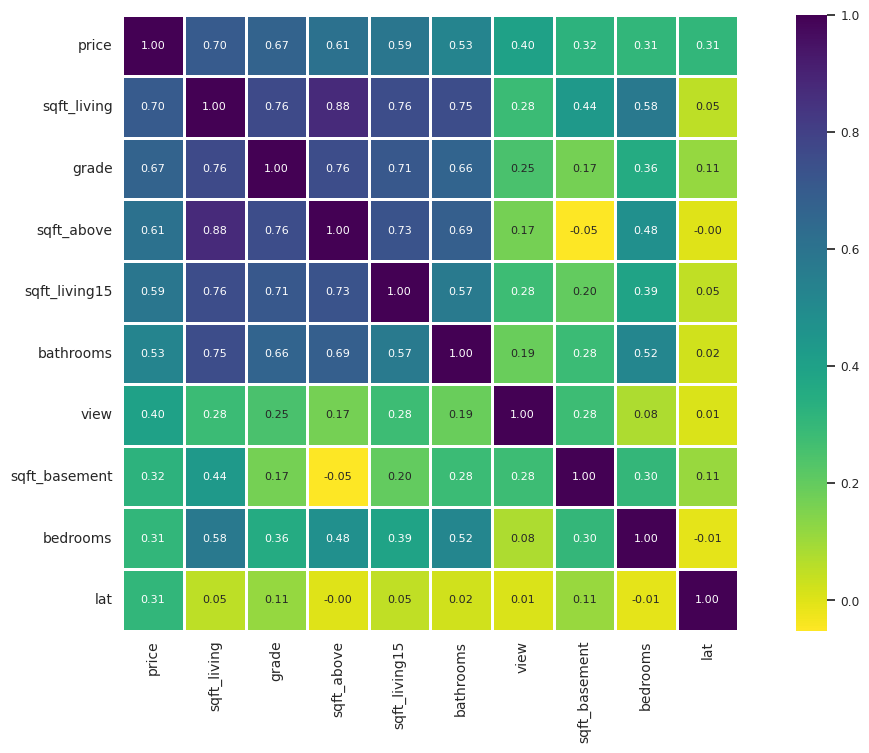

In [22]:
corr = df.corr()
k = 10  # number of columns in our heatmap
cols = corr.nlargest(k, "price")["price"].index
cm = np.corrcoef(df[cols].values.T)

with sns.axes_style("white"):
    f, ax = plt.subplots(figsize = (15, 8))
    sns.set(font_scale = 0.8)
    ax = sns.heatmap(cm, cbar = True, square = True, annot = True, fmt = "0.2f", linewidths = 0.8, cmap = "viridis_r",
                    annot_kws = {"size": 8}, yticklabels = cols.values, xticklabels = cols.values)

In [23]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'datetime', 'year',
       'month'],
      dtype='object')

In [24]:
df = df.drop(columns = ["id", "date", "datetime"])
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'year', 'month'],
      dtype='object')

# Initializing ML Models

In [25]:
X = df.drop("price", axis = 1)
y = df["price"]

In [26]:
print(X.shape, y.shape)

(21613, 20) (21613,)


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [28]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(17290, 20) (4323, 20) (17290,) (4323,)


### Scaling Data

In [29]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Linear Regression

In [30]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
print("R2 Score :",r2_score(y_test, lr_pred) * 100, "%")

R2 Score : 70.26040931979199 %


## SGDRegressor

In [31]:
sgd = SGDRegressor()
sgd.fit(X_train, y_train)
sgd_pred = sgd.predict(X_test)
# Performance Measurement
print("MSE: ", mean_squared_error(y_test, sgd_pred))
print("R2 Score: ", r2_score(y_test, sgd_pred) * 100, "%")

MSE:  45355572966.112816
R2 Score:  69.9983070877666 %


## Model Hyperparameters Tuning

In [32]:
params = {
    'learning_rate': ['constant', 'optimal', 'invscaling'],
    'penalty': ['l1', 'l2', 'elasticnet'],
    'alpha': [0.0001,0.001,0.01,0.1]
   
}
# Use GridSearchCV to tune the hyperparameters
grid = GridSearchCV(sgd, params, cv=5)
grid.fit(X_train, y_train)

# Print the best hyperparameters
print(grid.best_params_)

# Use the best hyperparameters to train the model
sgd = SGDRegressor(**grid.best_params_)
sgd.fit(X_train, y_train)

# Evaluate the model on the testing set
y_pred = sgd.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
sgd_r3 = r2_score(y_test, y_pred)
print(f"Mean squared error = {mse}")
print(f"R2 = {round(sgd_r3*100)} % ")

{'alpha': 0.0001, 'learning_rate': 'invscaling', 'penalty': 'elasticnet'}
Mean squared error = 45433874105.143
R2 = 70 % 


In [33]:
sgd = SGDRegressor()
sgd.fit(X_train, y_train)

# Prediction
pickle.dump(sgd,open('model.pkl','wb'))

model = pickle.load(open('model.pkl','rb'))

x=model.predict([[4,2.00,1920,7803,1.0,0,0,3,7,1080,840,1962,0,98155,47.7580,-122.325,1940,8147,2014,12]])*-1
print("The predicted  House Price = ",x,"M")

The predicted  House Price =  [2.36901911e+09] M


In [34]:
rfg_model = RandomForestRegressor()
rfg_model.fit(X_train, y_train)

print(rfg_model.score(X_test, y_test)*100,"%")

86.04176711555105 %


## Thank you!